In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import pandas as pd

from neutrons.diffusing_neutrons import DiffusingNeutrons

In [2]:
def plot_trajectories(positions: np.ndarray, radius: float = None, height: float = None):
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    if radius is not None and height is not None:
        ax.plot([-radius, -radius], [0, 0], [-height/2, height/2], c="k")
        ax.plot([0, 0], [radius, radius], [-height/2, height/2], c="k")

    for position in positions:
        x = [p[0] for p in position]
        y = [p[1] for p in position]
        z = [p[2] for p in position]
        ax.plot(x, y, z, c="k", linewidth=0.3, alpha=0.5)

    ax.plot(0, 0, 0, "o", c="r")
    ax.set_xlabel("$x(m)$", fontsize=16)
    ax.set_ylabel("$y(m)$", fontsize=16)
    ax.set_box_aspect(aspect=None, zoom=0.9)
    ax.set_zlabel("$z(m)$", fontsize=16)
    
    if radius is not None and height is not None:
        #ax.plot([0], [0], [-height/2], "o", c="r")
        #ax.plot([0], [0], [height/2], "o", c="r")  # Adjust the height of the center point
        #ax.plot([0, 0], [0, 0], [-height/2, height/2], c="r")  # Adjust the height of the center line
        ax.plot([0, 0], [-radius, -radius], [-height/2, height/2], c="k")
        ax.plot([radius, radius], [0, 0], [-height/2, height/2], c="k")
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, height, 100)
        x = radius * np.outer(np.cos(u), np.ones_like(v))
        y = radius * np.outer(np.sin(u), np.ones_like(v))
        z = np.outer(np.ones_like(u), v) - height/2  # Adjust the height of the cylinder
        ax.plot_surface(x, y, z, color="C0", alpha=0.2)
    plt.show()

In [3]:
data = pd.read_csv("data/mean_free_path.csv")
mean_free_paths = list(data["lambda(m)"])
energies = list(data["Energy(eV)"])

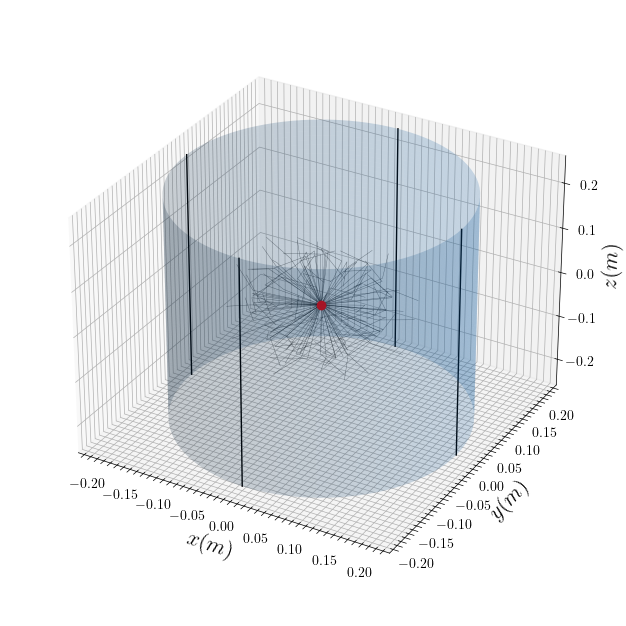

0

In [5]:
nNeutrons = 100
initial_positions = [np.array([0, 0, 0]) for _ in range(nNeutrons)]
initial_energies = [10*10**6 for _ in range(nNeutrons)]

diffusing_neutrons = DiffusingNeutrons(mean_free_paths, energies, initial_positions, initial_energies, radius_tank=0.2, height_tank=0.5)
diffusing_neutrons.diffuse(nCollisions=2)

plot_trajectories(diffusing_neutrons.get_positions(), diffusing_neutrons.tank.radius, diffusing_neutrons.tank.height)
diffusing_neutrons.get_number_escaped()

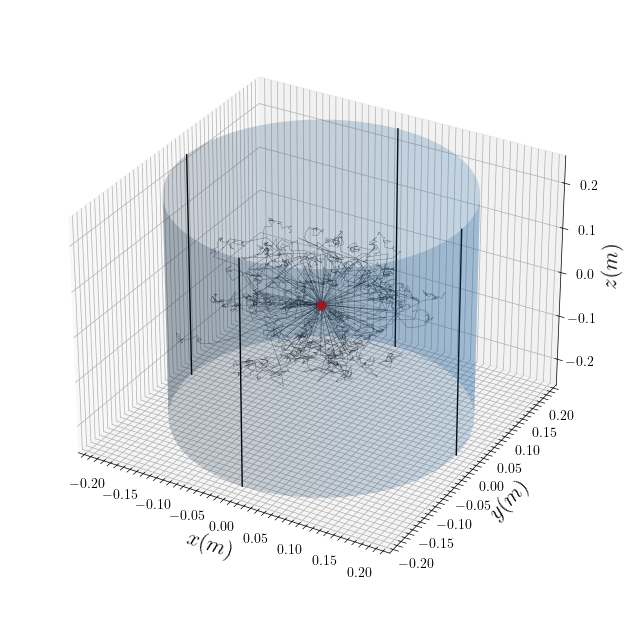

0

In [6]:
diffusing_neutrons.diffuse(nCollisions=30)
plot_trajectories(diffusing_neutrons.get_positions(), diffusing_neutrons.tank.radius, diffusing_neutrons.tank.height)
diffusing_neutrons.get_number_escaped()

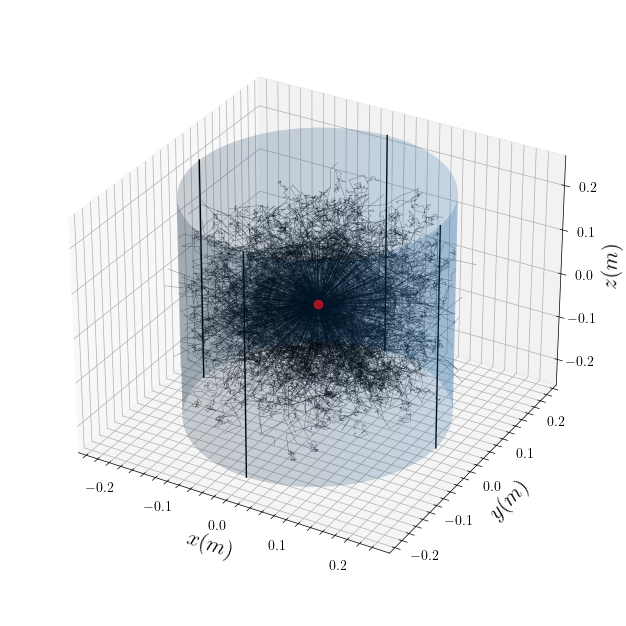

134

In [7]:
nNeutrons = 1000
initial_positions = [np.array([0, 0, 0]) for _ in range(nNeutrons)]
initial_energies = [20*10**6 for _ in range(nNeutrons)]

diffusing_neutrons = DiffusingNeutrons(mean_free_paths, energies, initial_positions, initial_energies, radius_tank=0.2, height_tank=0.5)
diffusing_neutrons.diffuse(nCollisions=50)

plot_trajectories(diffusing_neutrons.get_positions(), diffusing_neutrons.tank.radius, diffusing_neutrons.tank.height)
diffusing_neutrons.get_number_escaped()